## Group Members: Yuxin (Annabel Du), Eva Slunjski, Samuel Rubidge, Xitaaz Rampersad

### Question 1 - Pick an asset universe that is representative of the broad multi-asset universe, includingdifferent asset classes and geographic regions. Get data since 2010, of at least monthly frequency, and calculate monthly returns. You do not need to go crazy - you should have at least 10 assets, but you don’t need to go off and get 50, although it will likely be easier to obtain and interpret more robust results if you have more assets

What each ticker stands for in our asset universe:

SP500: Standard & Poor’s 500 Index (the flagship US large-cap equity benchmark)

NDX: Nasdaq 100 Index (the 100 largest non-financial companies listed on Nasdaq)

DJI: Dow Jones Industrial Average (30 major US blue-chip stocks)

EWJ: iShares MSCI Japan ETF (tracks the MSCI Japan equity index)

EEM: iShares MSCI Emerging Markets ETF (tracks the MSCI Emerging Markets index)

EFA: iShares MSCI EAFE ETF (tracks the MSCI Europe, Australasia & Far East ex-US index)

GLD: SPDR Gold Shares (physically backed gold-holding ETF)

USO: United States Oil Fund LP (futures-based WTI crude oil fund)

IEF: iShares 7–10 Year Treasury ETF (US government bonds with 7–10 year maturities)

HYG: iShares iBoxx $ High Yield Corporate Bond ETF (US high-yield corporate bonds)

VNQ: Vanguard Real Estate ETF (US real estate investment trusts)

SPTSX: S&P/TSX Composite Index (Canada’s broad-market equity benchmark)

SXXP: STOXX Europe 600 Index (600 large, mid and small-cap companies across 17 European countries)

ASX: FTSE All-Share Index (the broad UK equity market index)

UUP: Invesco DB US Dollar Index Bullish Fund (tracks the ICE US Dollar Index)

FXE: Invesco CurrencyShares Euro Trust (tracks the euro against the US dollar)

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Load the CSV file into a DataFrame
df = pd.read_csv('HW3_Macro_Data.csv')
df.set_index('Date', inplace=True)

df = df.drop(columns=['CPI', 'FDFD'])

df.sort_values(by='Date', inplace=True)

# Display the first few rows
print(df.head())

             SP500       NDX       DJI    EWJ    EEM    EFA       GLD     USO  \
Date                                                                            
1/29/2010  1073.87   1741.04  10067.33  39.36  38.28  52.48  105.9600  285.12   
1/29/2016  1940.24   4279.17  16466.30  46.00  30.57  55.48  106.9492   77.20   
1/29/2021  3714.24  12925.38  29982.62  66.99  53.31  72.39  172.6100   35.18   
1/30/2015  1994.99   4148.43  17164.95  45.96  39.02  61.22  123.4500  142.56   
1/31/2011  1286.12   2281.91  11891.93  43.72  45.81  59.44  129.8700  308.88   

              IEF    HYG    VNQ     SPTSX    SXXP      ASX    UUP     FXE  
Date                                                                       
1/29/2010   90.70  86.23  42.27  11094.31  246.96  2660.49  23.45  138.39  
1/29/2016  109.11  79.29  76.99  12822.13  342.27  3335.90  25.86  105.97  
1/29/2021  118.64  86.97  84.96  17337.03  395.85  3641.93  24.42  113.87  
1/30/2015  110.55  90.23  86.55  14673.48  367.05  3

## Question 2 - Standardize the asset price return data you are using such that doing analysis on thisuniverse will make sense and results will be comparable across assets. Normalizing by volatility (so you are looking at everything in standard deviation terms), is a reasonable approach.

               SP500       NDX       DJI       EWJ       EEM       EFA  \
Date                                                                     
2024-12-31 -0.687841  0.146943 -0.973845 -1.140561 -0.757860 -1.442473   
2025-01-31  0.728582  0.839651  0.812267  0.485132  0.826676  1.050142   
2025-02-28 -0.374771 -0.825741 -0.271083  0.085225  0.420108  0.742620   
2025-03-31 -1.649308 -1.772698 -0.938728  0.055985  0.462844  0.046695   
2025-04-30 -0.219627  0.331946 -0.795041  2.211319  0.166919  1.877052   

                 GLD       USO       IEF       HYG       VNQ     SPTSX  \
Date                                                                     
2024-12-31 -0.344297  1.009989 -1.182957 -1.084960 -1.514284 -0.877569   
2025-01-31  1.451744  0.976520  0.268556  0.826418  0.276986  0.786206   
2025-02-28  0.418064 -0.835342  1.103189  0.363124  0.584754 -0.127896   
2025-03-31  1.937420  0.718247  0.023645 -1.010948 -0.617317 -0.644289   
2025-04-30  1.709160 -1.811638  0.701

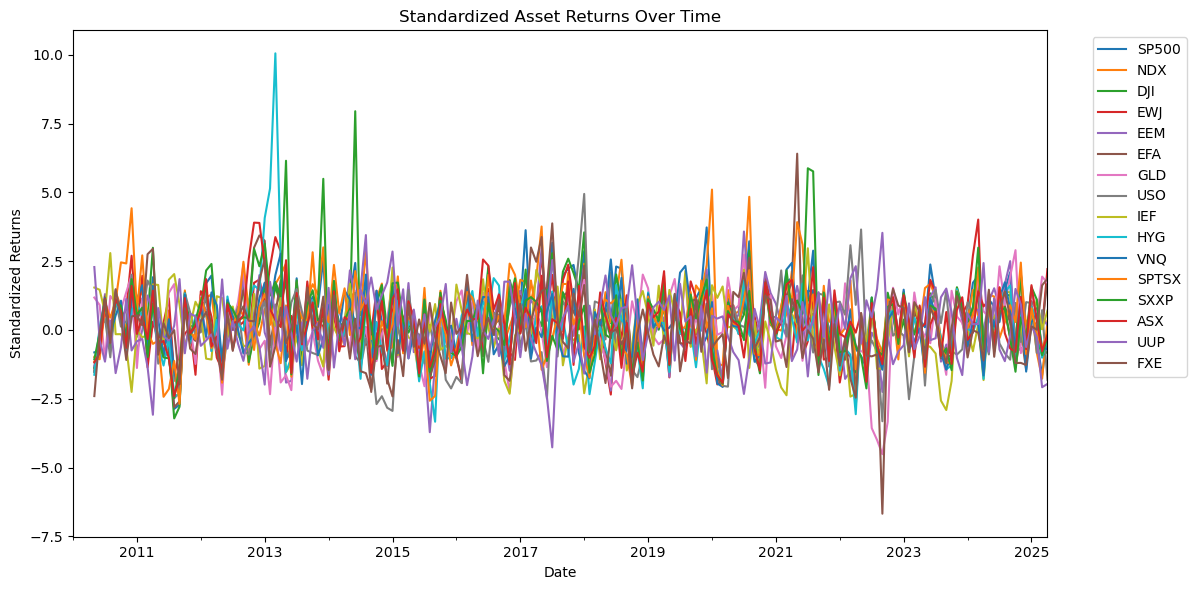

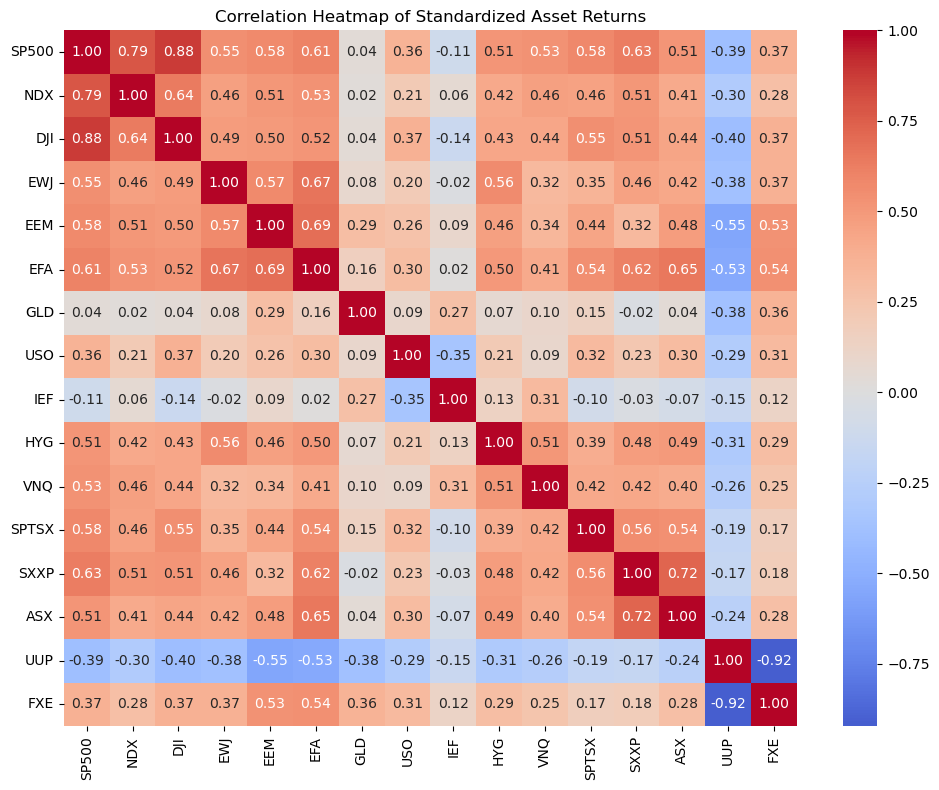

In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load the uploaded CSV
file_path = "HW3_Macro_Data.csv"
standardized_returns = pd.read_csv(file_path)

#standardized_returns.sort_values(by='Date', inplace=True, ascending=True)

# Convert the index to datetime if there's a date column
if 'Date' in standardized_returns.columns:
    standardized_returns['Date'] = pd.to_datetime(standardized_returns['Date'])
    standardized_returns = standardized_returns.set_index('Date')

# Calculate percentage returns

standardized_returns.sort_values(by='Date', inplace=True, ascending=True)
returns = standardized_returns.pct_change()

# Standardize by 3-month rolling volatility (standard deviation)
standardized_returns = returns / returns.rolling(window=4).std()


standardized_returns = standardized_returns.drop(columns=['CPI', 'FDFD'])


print(standardized_returns.tail(5))

#PLOT 1

standardized_returns.plot(figsize=(12, 6), title="Standardized Asset Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Standardized Returns")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()



###PLOT 2


correlation_matrix = standardized_returns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Standardized Asset Returns")
plt.tight_layout()
plt.show()

## Question 3 - Pick 2-3 macro data series you think are relevant for the pricing of this universe. They should be available since 2010 and of monthly frequency. Why do you think these are relevant for the asset prices you have chosen?

We chose CPI (Consumer Price Index) and FDFD (Fed Funds Rate)

In [14]:
df = pd.read_csv('HW3_Macro_Data.csv')
df.set_index('Date', inplace=True)

df.sort_values(by='Date', inplace=True)

df = df.drop(columns=[x for x in df.columns if x not in ['CPI', 'FDFD']])

df

,CPI,FDFD
Date,,
1/29/2010,2.6,0.12
1/29/2016,1.4,0.27
1/29/2021,1.4,0.08
1/30/2015,-0.1,0.04
1/31/2011,1.6,0.18
...,...,...
9/30/2019,1.7,1.90
9/30/2020,1.4,0.08
9/30/2021,5.4,0.07


## Question 4 - From 2010-2024, empirically verify if the macro data series are relevant for the asset price series. You can do this via linear regression, as discussed in class, or via some other method. Explain and justify your approach.

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('HW3_Macro_Data.csv')
df.set_index('Date', inplace=True)

df.sort_values(by='Date', inplace=True)

# 1. Select features and scale them
scaler = StandardScaler()
X_raw = df[['CPI', 'FDFD']]
X_scaled = scaler.fit_transform(X_raw)

results = []

# 2. Loop over each column as the dependent variable
for col in df.columns:
    if col in ['CPI', 'FDFD']:
        continue  # skip the regressors themselves
    y = df[col]
    
    # 3. Fit the model using scaled X
    model = LinearRegression()
    model.fit(X_scaled, y)

    # 4. Extract betas and R^2
    beta_cpi, beta_fdfd = model.coef_
    r2 = model.score(X_scaled, y)
    
    results.append({
        'variable': col,
        'beta_CPI':     beta_cpi,
        'beta_FDFD':    beta_fdfd,
        'r_squared':    r2
    })

# 5. Build and print the summary DataFrame
results_df = pd.DataFrame(results).set_index('variable')
print(results_df)


             beta_CPI    beta_FDFD  r_squared
variable                                     
SP500      400.043577   860.402565   0.621487
NDX       1640.593987  3488.516466   0.600921
DJI       2914.459963  6084.893378   0.629299
EWJ          1.756908     5.356460   0.378597
EEM          1.333752    -0.895900   0.084578
EFA          1.690908     4.268699   0.340560
GLD          8.139553    19.646953   0.401763
USO        -12.886155   -41.550591   0.219282
IEF         -0.114199    -3.989423   0.273360
HYG         -1.569457    -3.897426   0.640494
VNQ          5.111503     3.094471   0.229099
SPTSX     1258.359826  2197.630428   0.647553
SXXP        17.026718    49.899069   0.535164
ASX         95.103321   315.602444   0.489766
UUP          0.369997     1.729826   0.614771
FXE         -2.255335    -7.693924   0.395432
